# ANLY 590 Homework2
## Yunxi Zhang yz721

In [1]:
import numpy as np
import tensorflow as tf

# 1 Feedforward: Building a ReLU neural net- work

## 1.1. Draw a network with:

![HW2_1.1.jpg](./HW2_1.1.jpg)

## 1.2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

$$g(x)=max(0,x)$$
$$h_{1}=g(x_{1}w_{11}+x_{2}w_{21}+b_{1})$$
$$h_{2}=g(x_{1}w_{12}+x_{2}w_{22}+b_{2})$$
$$h_{3}=g(x_{1}w_{13}+x_{2}w_{23}+b_{3})$$
$$h_{4}=g(x_{1}w_{14}+x_{2}w_{24}+b_{4})$$
$$y=\frac {1} {1+ e^{-(h_{1}v_{1}+h_{2}v_{2}+h_{3}v_{3}+h_{4}v_{4}+c)}}$$

## 1.3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [3]:
def ff_nn_Relu(x,w,b,v,c):
    return tf.nn.sigmoid(np.dot(v,tf.nn.relu(np.dot(w,x)+b))+c)

## 1.4.what are the class probabilities associated with the forward pass of each sample?

In [4]:
x=np.array([[1,0,0],[-1,-1,1]])
w=np.array([[1,0],[-1,0],[0,0.5],[1,1]])
b=np.array([[0],[0],[1],[0]])
v=np.array([[1,0,-1,1]])
c=[1]

In [5]:
ff_nn_Relu(x,w,b,v,c)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.81757448, 0.62245933, 0.62245933]])>

# 2. Gradient Descent

## 2.1.What are the partial derivatives of f with respect to x and to y?

![HW2_2.1.jpg](./HW2_2.1.jpg)

## 2.2. Create a visualization of the contours of this function.

In [6]:
import matplotlib.pyplot as plt

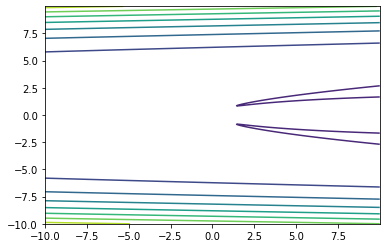

In [8]:
x = np.arange(-10,10,0.01)
y = np.arange(-10,10,0.01)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z)

## 2.3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [9]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * (x ** 2) + 100 * x - 200 * (y ** 2)
    df_dy = 800 * (y ** 3) - 400 * x * y
    return np.array([df_dx, df_dy])

In [13]:
def grad_descent(starting_point=None, iterations=10, learning_rate=0.0000005):
    if starting_point is None:
        point = np.random.uniform(-10,10,size=2)
    else:
        point=starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

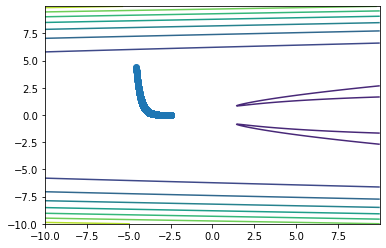

In [17]:
traj = grad_descent(iterations=5000, learning_rate=0.000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

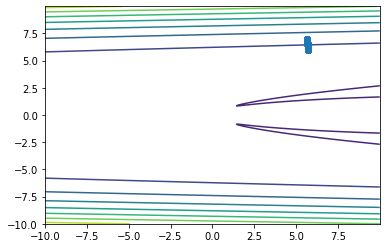

In [18]:
traj = grad_descent(iterations=5000, learning_rate=0.000000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

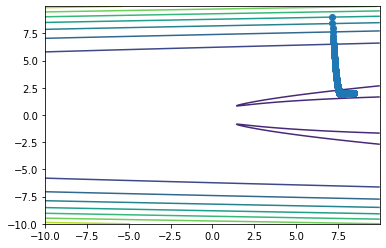

In [22]:
traj = grad_descent(iterations=5000, learning_rate=0.000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 2.4.  Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters. 

In [23]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad=grad_f(point)
        v = alpha * v + epsilon *grad
        point = point - v
        trajectory.append(point)
    
    return np.array(trajectory)

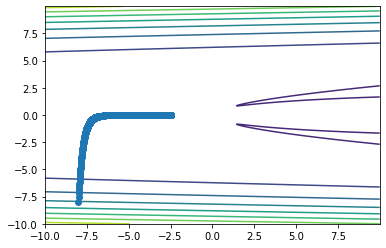

In [25]:
traj = grad_descent_with_momentum(starting_point=np.array([-8,-8]),iterations=10000,epsilon=0.000001,alpha=.0005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

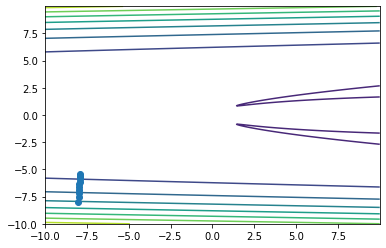

In [26]:
traj = grad_descent_with_momentum(starting_point=np.array([-8,-8]),iterations=10,epsilon=0.000001,alpha=.0005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

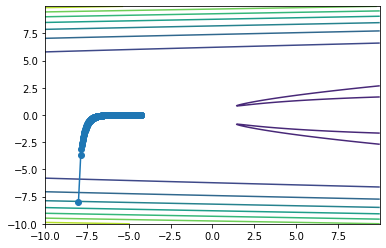

In [29]:
traj = grad_descent_with_momentum(starting_point=np.array([-8,-8]),iterations=500,epsilon=0.00001,alpha=.0005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3. Backprop

## 3.1.For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

![HW2_3.1.jpg](./HW2_3.1.jpg)

## 3.2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [30]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))
    

In [31]:
W = np.random.randn(8).reshape((4,2))
b = np.random.randn(4)
v = np.random.randn(4)
c = np.random.randn(1)

def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])

    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4, dL_dv1, dL_dv2, dL_dv3, dL_dv4,dL_dc])

## 3.3. Generate a synthetic dataset like the XOR pattern (see below).

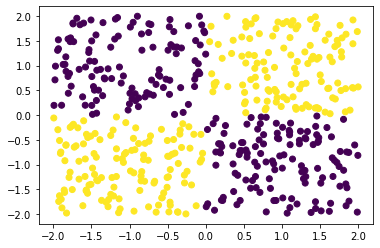

In [32]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## 3.4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [33]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

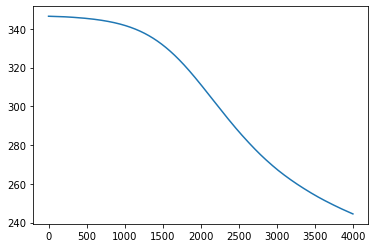

In [35]:
traj, losses = grad_descent(x, y, iterations=4000,learning_rate=1e-2)
plt.plot(losses)

## 3.5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [42]:
def grad_descent(x, y,  iterations=200, alpha=.02, epsilon=0.05):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad=grad_f(point, x, y)
        v = alpha * v + epsilon *grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

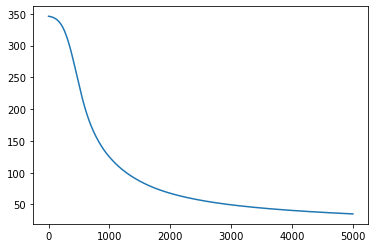

In [43]:
traj, losses = grad_descent(x, y, iterations=5000,alpha=0.001, epsilon=0.05)
plt.plot(losses)


## 3.6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

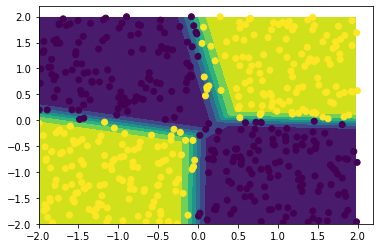

In [44]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)